# Here's some data!

### 1. Import the data. It's stored in a file called 'movie_data_detailed.xlsx'.

In [6]:
import pandas as pd
%matplotlib inline

In [283]:
df = pd.read_excel('movie_data_detailed.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes
0,13000000,25682380,21 &amp; Over,NaN,2008.0,6.8,48.0,206513.0
1,45658735,13414714,Dredd 3D,NaN,2012.0,NaN,NaN,NaN
2,20000000,53107035,12 Years a Slave,NaN,2013.0,8.1,96.0,537525.0
3,61000000,75612460,2 Guns,NaN,2013.0,6.7,55.0,173726.0
4,40000000,95020213,42,NaN,2013.0,7.5,62.0,74170.0


### 2. Fill all the null values with zero.

In [284]:
df = df.fillna(value=0)
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes
0,13000000,25682380,21 &amp; Over,0.0,2008.0,6.8,48.0,206513.0
1,45658735,13414714,Dredd 3D,0.0,2012.0,0.0,0.0,0.0
2,20000000,53107035,12 Years a Slave,0.0,2013.0,8.1,96.0,537525.0
3,61000000,75612460,2 Guns,0.0,2013.0,6.7,55.0,173726.0
4,40000000,95020213,42,0.0,2013.0,7.5,62.0,74170.0


### 3. Import import sklearn.linear_model.LinearRegression
Create an instance of the LinearRegression class.
Then use the fit method to train a model according to the data.

In [9]:
import sklearn.linear_model as linreg

In [11]:
ols = linreg.LinearRegression() #Ordinary Least Squares Regressor

In [13]:
df.columns

Index(['budget', 'domgross', 'title', 'Response_Json', 'Year', 'imdbRating',
       'Metascore', 'imdbVotes'],
      dtype='object')

In [82]:
X = df[['budget', 'Year', 'imdbRating',
       'Metascore', 'imdbVotes']]
y = df['domgross']
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
ols.intercept_

130817606.19154045

In [15]:
ols.coef_

array([ 6.72229253e-01, -8.01610423e+04, -1.42223233e+06,  6.04048376e+05,
        2.47980683e+02])

In [17]:
for col in X.columns:
    print(col, df[col].min(), df[col].max(), df[col].mean(), df[col].median())

budget 5500000 225000000 67538624.5 52500000.0
Year 0.0 2013.0 1943.3666666666666 2013.0
imdbRating 0.0 8.1 6.073333333333333 6.7
Metascore 0.0 96.0 49.833333333333336 53.5
imdbVotes 0.0 537525.0 174972.13333333333 164598.0


In [18]:
ols.predict(X)

array([ 4.91275906e+07,  2.26726481e+05,  1.62662392e+08,  7.72338087e+07,
        4.15195823e+07,  1.60589781e+08,  8.54556342e+07,  5.91863659e+07,
        6.66226356e+06,  1.13047041e+08,  1.39117680e+08,  2.98716586e+07,
        4.45043458e+07,  6.06882570e+07,  1.36786039e+08,  6.87004516e+07,
        6.70566497e+07,  1.27979732e+08,  5.54462162e+07,  1.71350340e+08,
        4.33986459e+07,  8.14685997e+07,  1.46553274e+07,  8.58692660e+07,
        4.07699895e+07,  2.38374287e+08,  2.24232952e+08,  1.19315583e+08,
        7.12503217e+07, -1.78322294e+07])

### 4. Scatter Plot <a id="scatter"></a>  
Create a Scatter Plot of the budget and  Domestic Gross (domgross) along with your model's predictions.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

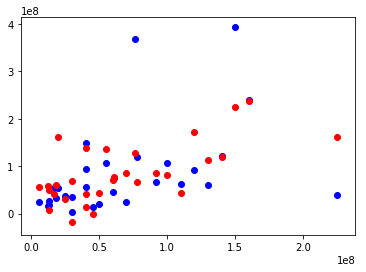

In [97]:
plt.scatter(df.budget, df.domgross, color='blue')
plt.scatter(df.budget, ols.predict(X), color='red')

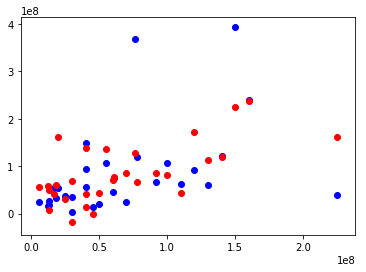

In [103]:
w = [ 6.72229253e-01, -8.01610423e+04, -1.42223233e+06,  6.04048376e+05,
        2.47980683e+02]
plt.scatter(df.budget, df.domgross, color='blue')
plt.scatter(df.budget, predict(X, w)+ols.intercept_, color='red')